In [136]:

#%% NumPyの読み込み
import numpy as np
import numpy.polynomial.polynomial as pol
import matplotlib.pyplot as plt

#%% 債券価格の計算
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)

#%% 債券価格の計算
def Bond_Price(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券価格
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[0.0, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), CF)
#%% 債券デュレーションの計算
def Bond_Duration(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券デュレーション
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue]
    Coef = np.linspace(1, Maturity, Maturity) * CF
    return pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) / Price
#%% 債券コンベクシティの計算
def Bond_Convexity(Yield, Maturity, CouponRate, FaceValue):
    #      Yield: 債券利回り (%)
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券コンベクシティ
    Price = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    Duration = Bond_Duration(Yield, Maturity, CouponRate, FaceValue)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[np.tile(Coupon, int(Maturity) - 1), Coupon + FaceValue]
    Coef = (np.linspace(1, Maturity, Maturity) - Duration)**2 * CF
    Dispersion = pol.polyval(1.0 / (1.0 + 0.01 * Yield), np.r_[0.0, Coef]) \
                 / Price
    return (Dispersion + (1.0 + Duration) * Duration) / (1.0 + 0.01 * Yield)**2

#債券価格・債券デュレーション・債券コンベクシティのリストを出す
def Output_3(Yield, Maturity, CouponRate, FaceValue):
    a = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    b = Bond_Price(Yield, Maturity, CouponRate, FaceValue)
    c = Bond_Convexity(Yield, Maturity, CouponRate, FaceValue)
    return (a,b,c)

In [137]:
#%% 債券の価格・債券デュレーションとコンベクシティの計算

#データの入力
Coupon_List = np.array([[4.50,1,5.25,100]
       ,[4.75,2,5.00,100]
       ,[4.95,3,4.50,100]
       ,[5.10,4,4.00,100]
       ,[5.20,5,3.50,100]
       ,[5.30,6,2.50,100]
       ,[5.34,7,1.50,100]
       ,[5.45,8,1.75,100]
       ,[5.50,9,1.00,100]
       ,[5.50,10,1.25,100]])

#データから行列で債券価格・デュレーション・コンベクシティを出力
for_Result = []
for a in Coupon_List:
    Yield = a[0]
    Maturity = a[1]
    CouponRate = a[2]
    Facevalue = a[3]
    Result = Output_3(Yield, Maturity, CouponRate, FaceValue)
    for_Result.append(Result)
Result_List = np.array(for_Result)
Result_List

/Users/keigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/Users/keigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


array([[100.71770335, 100.71770335,   1.8314599 ],
       [100.46650452, 100.46650452,   5.29498536],
       [ 98.77338935,  98.77338935,  10.27529311],
       [ 96.10849804,  96.10849804,  16.72359606],
       [ 92.68040365,  92.68040365,  24.6531397 ],
       [ 85.92340082,  85.92340082,  34.64272862],
       [ 78.05153724,  78.05153724,  47.11520351],
       [ 76.51516074,  76.51516074,  58.90798346],
       [ 68.71512138,  68.71512138,  75.66162893],
       [ 67.96509023,  67.96509023,  89.96160402]])

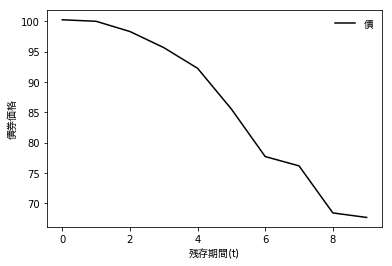

In [140]:
#債券価格のみを取り出す
V_price_A_List = []
for A in Result_List:
    VA1 = A[0]
    V_price_A_List.append(VA1)
#残存期間の設定
V_Yield_List = np.linspace(0, 9, 10)
#プロット
plt.plot(V_Yield_List, (V_price_A_List / V_price_A_List[1])*100, 'k-')
plt.xlabel(u'残存期間(t)', fontproperties=jpfont)
plt.ylabel(u'債券価格', fontproperties=jpfont)
Legend_A = u'債券A (D ={0:10f}，C ={1:10f})'.format(D_A, C_A)
plt.legend(Legend_A, loc='best', frameon=False, prop=jpfont)
plt.savefig('FinalReport2.png', dpi=300)
plt.show()

In [139]:
#3次式での最小2乗法の推定
coef_3 = np.polyfit(V_Yield_List,V_price_A_List,3) 
coef_3

array([ 9.49489963e-02, -1.51561395e+00,  2.30408502e+00,  1.00191124e+02])